In [12]:
import pyslfp as sl
import matplotlib.pyplot as plt

In [13]:
## import my code

from Part_III_Project.sea_surface_height import dSL_to_dSSH

# Setting up the load and model

Taken from Tutorial 2 in pyslfp

In [14]:
# 1. Initialise the fingerprint model
fp = sl.FingerPrint(lmax=256)

# 2. Set the background state to the present day
fp.set_state_from_ice_ng(version=sl.IceModel.ICE7G, date=0.0)

In [15]:
# Define the parameters for a disk load over Southern Greenland
lat_greenland, lon_greenland = 65.0, -45.0
radius_deg = 5.0
thickness_change_meters = -100.0

# Create a grid representing the change in ice thickness
ice_thickness_change = fp.disk_load(
    delta=radius_deg,
    latitude=lat_greenland,
    longitude=lon_greenland,
    amplitude=thickness_change_meters,
)

# Convert the ice thickness change into a surface mass load (in kg/m^2)
direct_load = fp.direct_load_from_ice_thickness_change(ice_thickness_change)

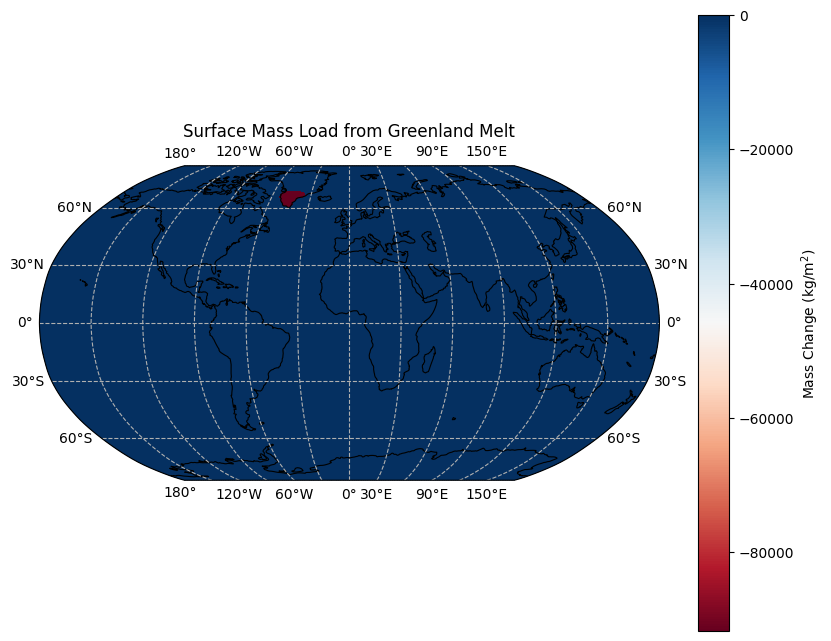

In [16]:
fig, ax, im = sl.plot(direct_load, coasts=True)
ax.set_title("Surface Mass Load from Greenland Melt")
fig.colorbar(im, ax=ax, label="Mass Change (kg/m$^2$)")
plt.show()

Getting the outputs:

In [17]:
sea_level_change, displacement, gravity_potential_change, angular_velocity_change = fp(
    direct_load=direct_load
)

Sea Level Change

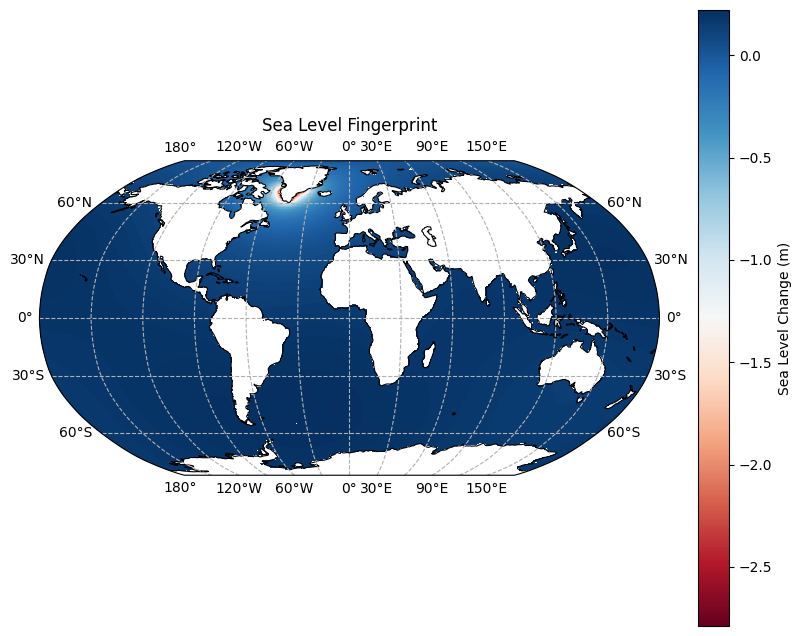

In [18]:
fig, ax, im = sl.plot(
    sea_level_change * fp.ocean_projection(),
    coasts=True,
    symmetric=False,
)
ax.set_title("Sea Level Fingerprint")
fig.colorbar(im, ax=ax, label="Sea Level Change (m)")
plt.show()

## Conversion of sea level change into sea surface change

In [19]:
sea_surface_change = dSL_to_dSSH(
    delta_sea_level=sea_level_change,
    delta_gravity_potential=gravity_potential_change,
)

Plotting

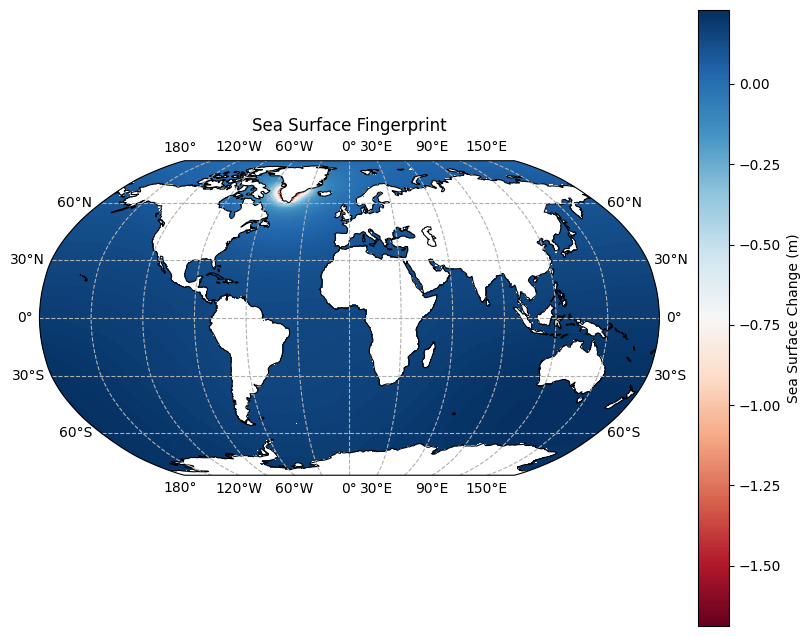

In [20]:
fig, ax, im = sl.plot(
    sea_surface_change * fp.ocean_projection(),
    coasts=True,
    symmetric=False,
)
ax.set_title("Sea Surface Fingerprint")
fig.colorbar(im, ax=ax, label="Sea Surface Change (m)")
plt.show()

Comparison of the two

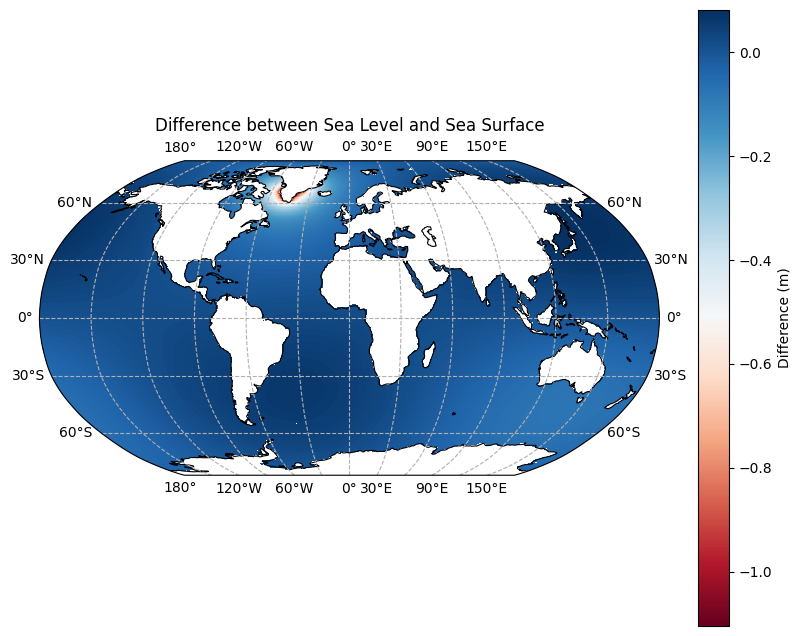

In [22]:
fig, ax, im = sl.plot(
    (sea_level_change - sea_surface_change) * fp.ocean_projection(),
    coasts=True,
    symmetric=False,
)

ax.set_title("Difference between Sea Level and Sea Surface")
fig.colorbar(im, ax=ax, label="Difference (m)")
plt.show()